# Understanding Descriptive Statistics

Import the necessary libraries here:

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [19]:
def roll_dice(times=10):
    rolled_numbers = []
    for i in range(times):
        rolled_numbers.append(random.randint(1,6))
    return rolled_numbers
        
rolled_numbers = roll_dice()

In [20]:
df = pd.DataFrame(rolled_numbers)
df.columns = ['Rolled number']

In [21]:
df.head()

,Rolled number
0,6
1,1
2,4
3,3
4,6


In [22]:
rolled_numbers
df['Rolled number'].describe()

count    10.000000
mean      4.000000
std       1.943651
min       1.000000
25%       3.000000
50%       4.500000
75%       5.750000
max       6.000000
Name: Rolled number, dtype: float64

#### 2.- Plot the results sorted by value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B79D402DA0>]],
      dtype=object)

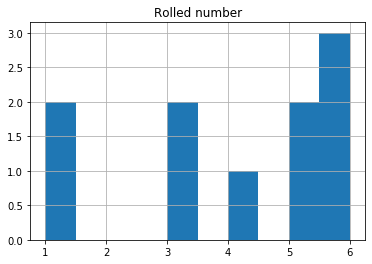

In [23]:
df.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [25]:
df['Rolled number'].value_counts()

6    3
5    2
3    2
1    2
4    1
Name: Rolled number, dtype: int64

In [138]:
"""
Its the same.
"""

'\nIts the same.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [264]:
def mmean(my_list):
    return sum(my_list)/len(my_list)

In [4]:
mmean(rolled_numbers)

NameError: name 'mmean' is not defined

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [200]:
def freq(rolled_numbers):
    d = {}
    for i in rolled_numbers:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
fre = freq(rolled_numbers)

In [268]:
sm = []
for k in fre:
    sm.append(k*fre[k])
sum(sm)/len(rolled_numbers)

3.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [595]:
def mmedian(lst):
    lst = sorted(lst)
    if len(lst)%2 != 0:
        return lst[len(lst)//2+1]
    else:
        return (lst[int(len(lst)/2)]+lst[int(len(lst)/2-1)])/2


In [596]:
mmedian(rolled_numbers)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [647]:
def quartiles(lst):
    lst = sorted(lst)
    print('Q1 = ', mmedian(lst[:len(lst)//2-1]))
    print('Q2 = ', mmedian(lst))
    print('Q3 = ', mmedian(lst[len(lst)//2+1:]))

In [640]:
quartiles(rolled_numbers)

Q1 =  1.5
Q2 =  4.0
Q3 =  5.0


In [630]:
sorted(rolled_numbers)

[1, 1, 2, 3, 4, 4, 4, 5, 5, 5]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [641]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv')

In [643]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [645]:
df.sort_values('value')

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


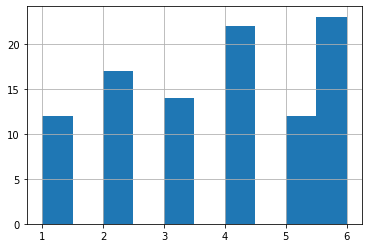

In [444]:
df['value'].hist()

In [447]:
"""
They are pretty equal
"""

'\nThey are pretty equal\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [448]:
mmean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [450]:
freq(df['value'])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

In [452]:
df['value'].value_counts(normalize=True)

6    0.23
4    0.22
2    0.17
3    0.14
5    0.12
1    0.12
Name: value, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

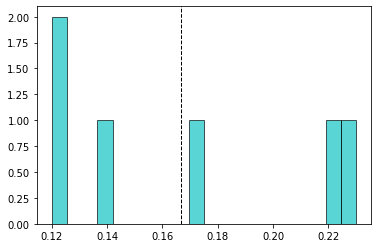

In [459]:
plt.hist(df['value'].value_counts(normalize=True), bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['value'].value_counts(normalize=True).mean(), color='k', linestyle='dashed', linewidth=1)


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [461]:
df = pd.read_csv('../data/roll_the_dice_thousand.csv')

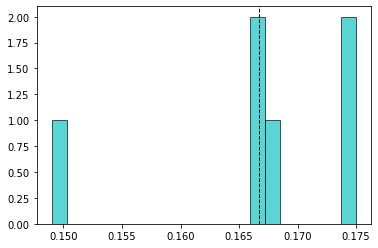

In [465]:
plt.hist(df['value'].value_counts(normalize=True), bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['value'].value_counts(normalize=True).mean(), color='k', linestyle='dashed', linewidth=1)


In [466]:
# variance is bigger on more rolls naturally

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [543]:
df = pd.read_csv('../data/ages_population.csv')

In [545]:
df['observation'].mean()

36.56

In [546]:
df['observation'].std()

12.816499625976762

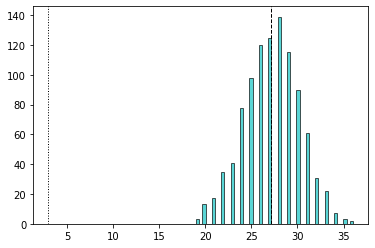

In [542]:
plt.hist(df['observation'], bins=50, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['observation'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['observation'].std(), color='k', linestyle='dotted', linewidth=1)


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [541]:
mmean(df['observation'])

27.155

In [495]:
df['observation'].std()

12.816499625976762

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

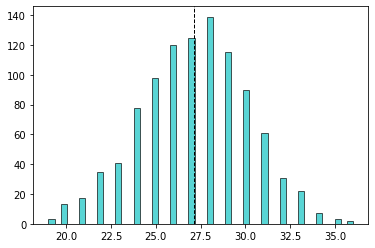

In [537]:
df = pd.read_csv('../data/ages_population2.csv')
plt.hist(df['observation'], bins=50, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['observation'].mean(), color='k', linestyle='dashed', linewidth=1)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [538]:
"""
Similar but differnet, more data = more outliers etc.
"""

'\nSimilar but differnet, more data = more outliers etc.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [539]:
df['observation'].mean()

27.155

In [540]:
df['observation'].std()

2.969813932689186

In [ ]:
"""
More data = less STD, mean also changed due the amount of data
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

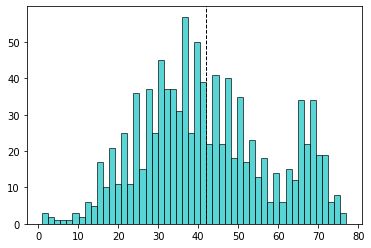

In [650]:
df = pd.read_csv('../data/ages_population3.csv')
plt.hist(df['observation'], bins=50, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['observation'].mean(), color='k', linestyle='dashed', linewidth=1)


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [651]:
df['observation'].mean()

41.989

In [652]:
df['observation'].std()

16.144705959865934

In [653]:
"""
Its all related to the amount of data 
"""

'\nIts all related to the amount of data \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [655]:
quartiles(df['observation'])

Q1 =  30.0
Q2 =  40.0
Q3 =  53.0


In [656]:
df['observation'].mean()

41.989

In [2]:
"""
The more the data the closer the median and the mean SHOULD be in THEORY.
"""

'\nThe more the data the closer the median and the mean SHOULD be in THEORY.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [666]:
df['observation'].quantile(0.1)

22.0

In [667]:
df['observation'].quantile(0.9)

67.0

In [ ]:
"""
80% of the data is between 22 and 67. Mean of those are 44.5 which is fairly close.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
"""
your comments here
"""